<a href="https://colab.research.google.com/github/Ashish-Sinha07/Ashish-Sinha-programmer-202070/blob/main/Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Transport Demand Prediction

## Author : Ashish Sinha

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark


### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSV/Transport.csv')
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.shape

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')


There are 51645 rows and 10 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df.duplicated().value_counts()

False    51645
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In the above data:
1. There are no duplicate rows
2. There are no null values

In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [ ]:
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


## Data Wrangling

In [ ]:
df.head(3)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49


There is no specified target variable in the data.

According to business problem, it requires us to predict the number of tickets we can sell on a particular route and particular date and time. Hence, a new column is created for number of tickets by grouping the data on ride_id

In [ ]:
df['ride_id'].unique()

array([ 1442,  5437,  5710, ..., 13825, 13826, 14304])

In [ ]:
temp_df = df.groupby('ride_id')['seat_number'].count().reset_index()
temp_df.rename(columns = {'seat_number':'number_of_ticket'},inplace=True)
temp_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


Dropping unnecessary columns

In [ ]:
df.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis=1, inplace=True)
df.shape

(51645, 6)

In [ ]:
df.drop_duplicates('ride_id',inplace=True)
df.shape

(6249, 6)

Merging the two df's on column ride_id.

In [ ]:
df = df.merge(temp_df, how='left', on='ride_id')
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5
4,5778,27-11-17,7:12,Migori,Bus,49,31


In [ ]:
df['date_time'] = pd.to_datetime(df['travel_date'] +" "+ df['travel_time'])
df['travel_date'] = pd.to_datetime(df['travel_date'])
#df['travel_time'] = pd.to_datetime(df['travel_time'])

<ipython-input-17-41f07dbdaad2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_time'] = pd.to_datetime(df['travel_date'] +" "+ df['travel_time'])
<ipython-input-17-41f07dbdaad2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['travel_date'] = pd.to_datetime(df['travel_date'])


## Visualizations

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Distribution of tickets')

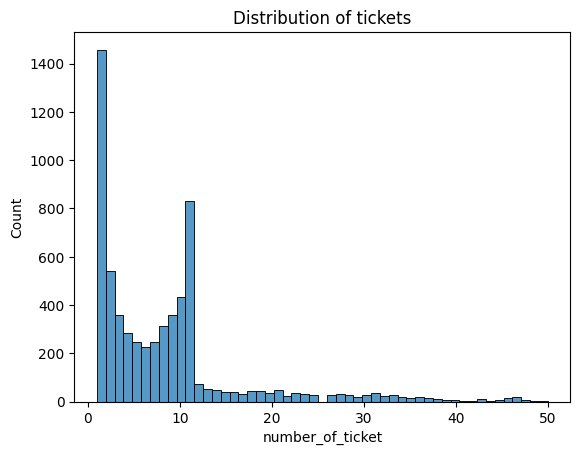

In [ ]:
sns.histplot(df['number_of_ticket'])
plt.title("Distribution of tickets")

Text(0.5, 1.0, 'Types of cars')

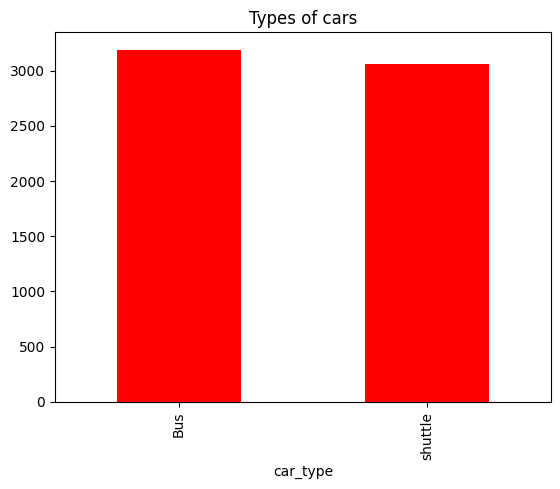

In [ ]:
df['car_type'].value_counts().plot(kind='bar',color='red')
plt.title("Types of cars")

Text(0.5, 1.0, 'Max Capacities')

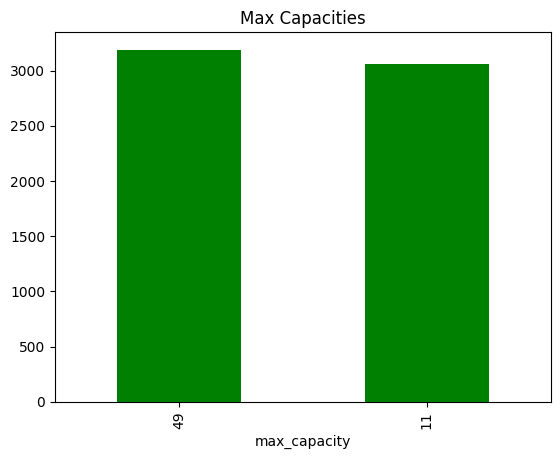

In [ ]:
df['max_capacity'].value_counts().plot(kind='bar',color='green')
plt.title("Max Capacities")

Text(0.5, 1.0, 'Total tickets from each origin place')

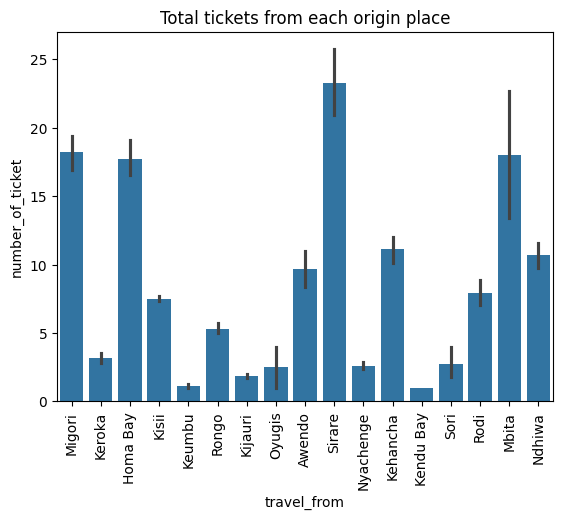

In [ ]:
sns.barplot(data=df,x='travel_from',y='number_of_ticket')
plt.xticks(rotation=90)
plt.title('Total tickets from each origin place')

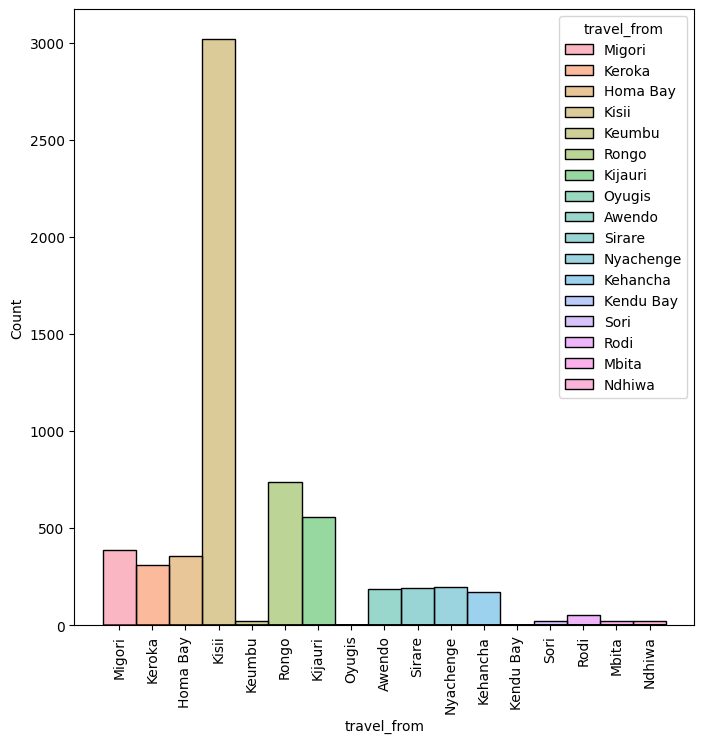

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=df,x='travel_from',hue='travel_from')
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.head(1)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00


In [ ]:
#Creating additonal features with travel_date and travel_time columns
def create_date_cols(df_temp):
  df_temp['travel_month'] = df_temp['travel_date'].dt.month
  df_temp['travel_year'] = df_temp['travel_date'].dt.year
  df_temp['travel_day_of_month'] = df_temp['travel_date'].dt.day
  df_temp['travel_day_of_year'] = df_temp['travel_date'].dt.dayofyear
  df_temp['travel_day_of_week'] = df_temp['travel_date'].dt.dayofweek
  df_temp['travel_hour'] = pd.to_datetime(df_temp['travel_time']).dt.hour
  df_temp['quarter'] = df_temp['travel_date'].dt.quarter
  df_temp['is_weekend'] = df_temp['travel_day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)

  return df_temp

df_copy = create_date_cols(df_copy)

In [ ]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0
1,5437,2017-11-19,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0
4,5778,2017-11-27,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0


In [ ]:
#Converting travel time into integer format
df['travel_time'] = df['travel_time'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60 )

In [ ]:
#Creating periods for time intervals
def get_period(hour):
  if hour<7: return 'em'
  elif hour>=7 and hour<=11: return 'mor'
  elif hour>11 and hour<=15: return 'an'
  elif hour>15 and hour<=19: return 'evn'
  elif hour>19 and hour<=24: return 'nght'

df_copy['time_period_of_day'] = df_copy['travel_hour'].apply(get_period)

In [ ]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0,mor
1,5437,2017-11-19,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1,mor
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1,mor
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0,mor
4,5778,2017-11-27,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0,mor


<Axes: xlabel='travel_day_of_week', ylabel='Count'>

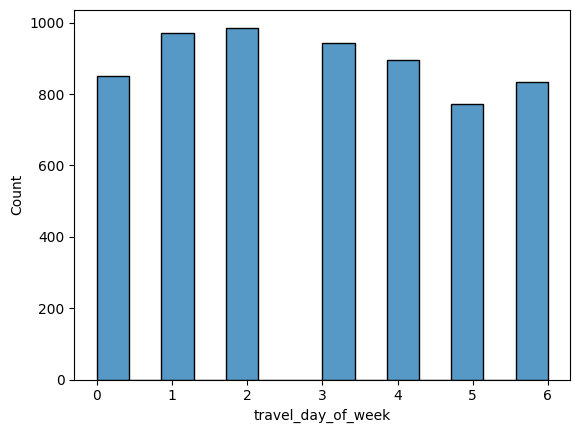

In [ ]:
sns.histplot(df_copy['travel_day_of_week'])

<Axes: xlabel='travel_day_of_week', ylabel='number_of_ticket'>

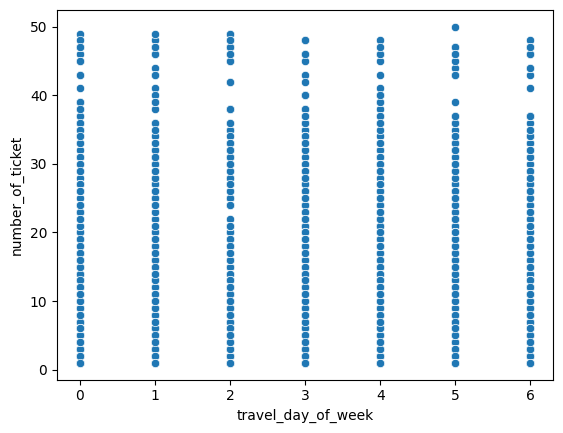

In [ ]:
sns.scatterplot(data=df_copy, x='travel_day_of_week',y='number_of_ticket')

<Axes: xlabel='travel_day_of_month', ylabel='Count'>

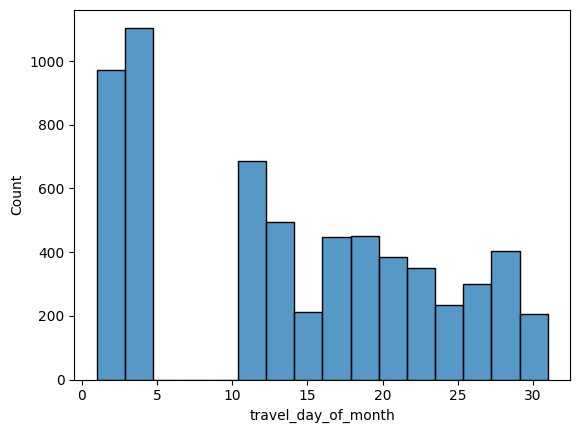

In [ ]:
sns.histplot(df_copy['travel_day_of_month'])

<Axes: xlabel='travel_day_of_month', ylabel='number_of_ticket'>

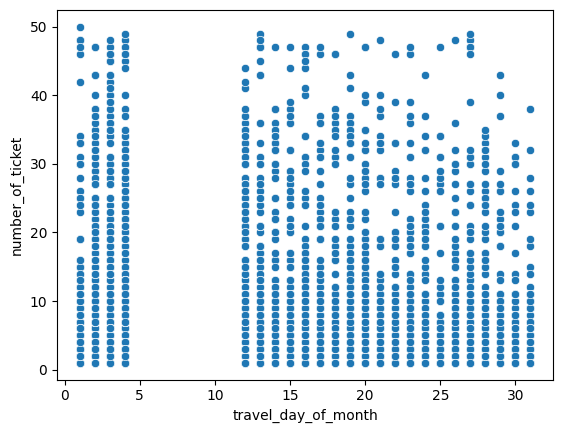

In [ ]:
sns.scatterplot(data=df_copy, x='travel_day_of_month',y='number_of_ticket',cmap='viridis')

<Axes: xlabel='travel_month', ylabel='Count'>

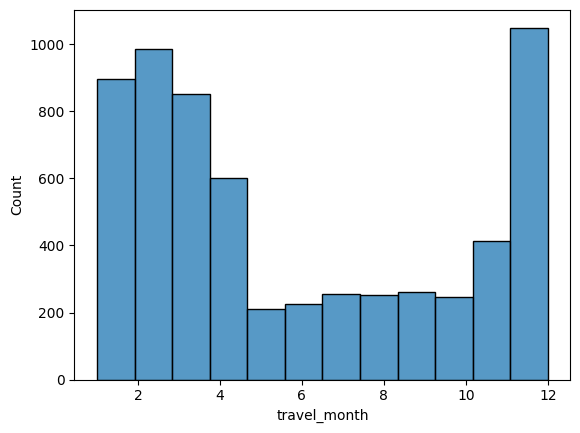

In [ ]:
sns.histplot(df_copy['travel_month'],bins=12)

<Axes: xlabel='travel_hour', ylabel='number_of_ticket'>

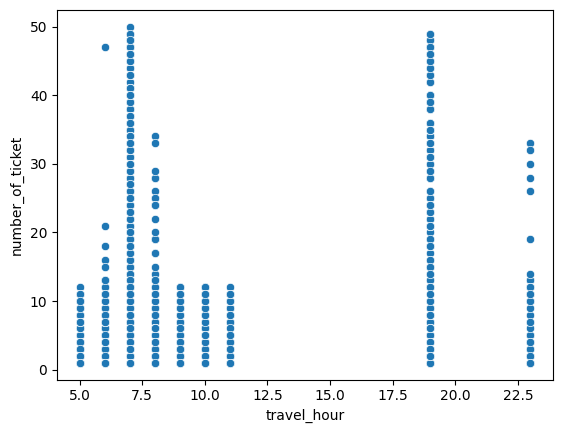

In [ ]:
sns.scatterplot(data=df_copy, x='travel_hour',y='number_of_ticket',cmap='viridis')

<Axes: xlabel='time_period_of_day', ylabel='number_of_ticket'>

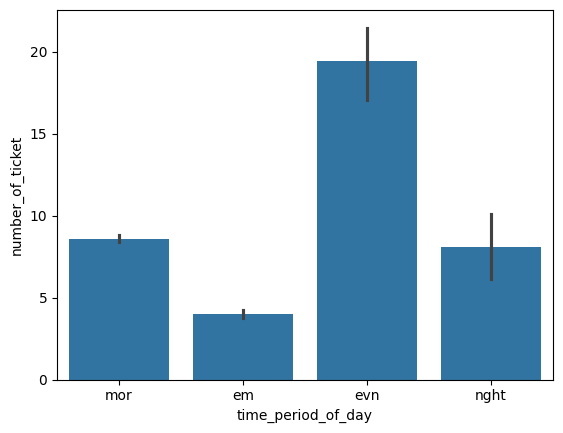

In [ ]:
sns.barplot(data=df_copy, x='time_period_of_day',y='number_of_ticket')

<Axes: xlabel='travel_day_of_year', ylabel='number_of_ticket'>

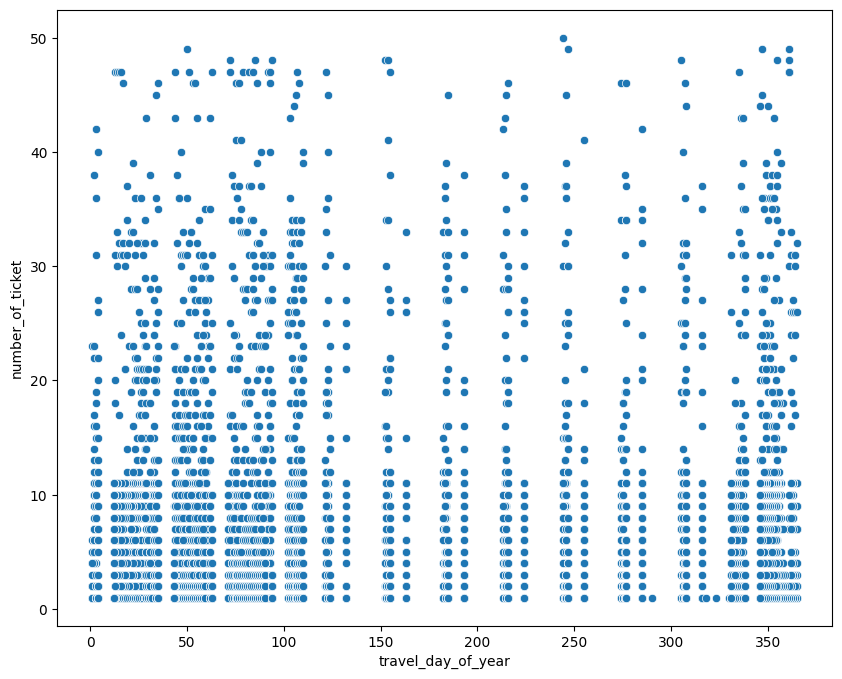

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_copy, x='travel_day_of_year',y='number_of_ticket',cmap='viridis')

From the above charts we can see that:

1. Most number of tickets are sold in the months of December (12), January(1) and February (2).

2. There is a gap in number of tickets sold between 5th and 11th of the month. We can assume public transport remains closed these days.

3. Most tickets were sold  on Mondays (1) and Tuesdays (2), this accounted for as there are first working days of the week

4. In the day, most tickets are sold at 7AM and close to 7PM. This can be because people going to and returning from work in Nairobi at these times. Similarly, there are no tickets sold between 12PM and 5:30 PM.

5. Most number of tickets are sold in evening followed by morning hours.

In [ ]:
df_copy.head(1)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0,mor


Text(0.5, 1.0, 'Number of tickets for each day of the month')

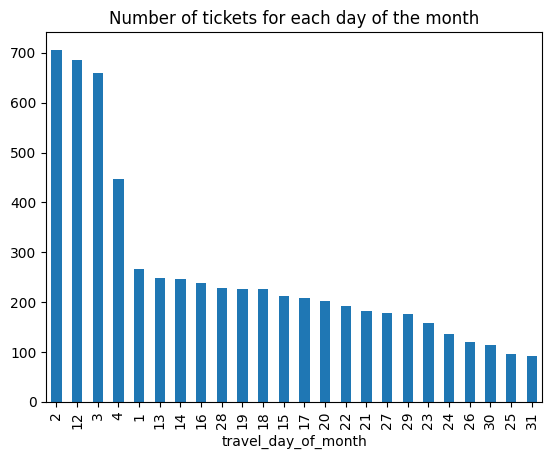

In [ ]:
df_copy['travel_day_of_month'].value_counts().plot(kind='bar')
plt.title('Number of tickets for each day of the month')

{'mor': 4975, 'em': 988, 'evn': 225, 'nght': 61}


<Axes: xlabel='time_period_of_day'>

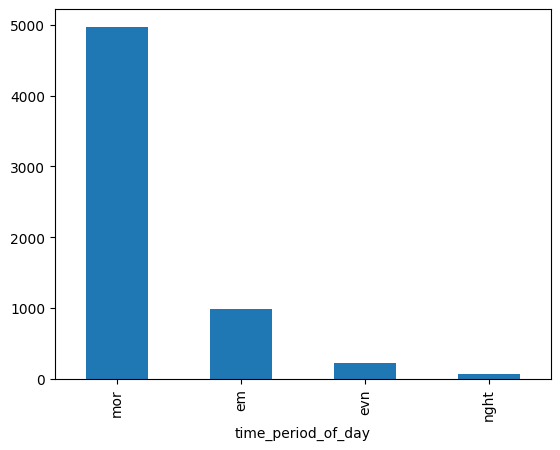

In [ ]:
print(dict(df_copy.time_period_of_day.value_counts()))

df_copy['time_period_of_day'].value_counts().plot(kind='bar')

In [ ]:
period_dict = dict(df_copy.time_period_of_day.value_counts())
df_copy['travel_hour_wise_weights'] = np.log1p(df_copy.time_period_of_day.map(period_dict))

# Creating a seperate column for giving day of a year wise weights for the hours column
day_of_year_dict = dict(df_copy.travel_day_of_year.value_counts())
df_copy['travel_day_of_year_wise_weights'] = np.log1p(df_copy.travel_day_of_year.map(day_of_year_dict))

# Giving weights to the each days of the month based on the frequency of ticket bookings
day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
df_copy['travel_day_of_month_wise_weights'] = df_copy.travel_day_of_month.replace(day_of_month_wise_weights_dict)

# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
travel_month_wise_weights_dict = {12: 1,
 2: 1,
 1: 1,
 3: 1,
 4: 1,
 11: 2,
 9: 3,
 7: 3,
 8: 3,
 10: 3,
 6: 3,
 5: 3}
df_copy['travel_month_wise_weights'] = df_copy.travel_month.replace(travel_month_wise_weights_dict)

In [ ]:
df_copy.head(3)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,...,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day,travel_hour_wise_weights,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,...,290,1,7,4,0,mor,8.512382,0.693147,3,3
1,5437,2017-11-19,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,...,323,6,7,4,1,mor,8.512382,0.693147,3,2
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,...,330,6,7,4,1,mor,8.512382,0.693147,4,2


In [ ]:
def find_difference_bw_bus(data):

  data.sort_values(["travel_from","date_time"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date_time.shift(-1)-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")


  return data

In [ ]:
transport_data_new = find_difference_bw_bus(df_copy)

In [ ]:
transport_data_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date_time', 'travel_month',
       'travel_year', 'travel_day_of_month', 'travel_day_of_year',
       'travel_day_of_week', 'travel_hour', 'quarter', 'is_weekend',
       'time_period_of_day', 'travel_hour_wise_weights',
       'travel_day_of_year_wise_weights', 'travel_day_of_month_wise_weights',
       'travel_month_wise_weights', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus'],
      dtype='object')

In [ ]:
transport_data_new.isnull().sum()

ride_id                             0
travel_date                         0
travel_time                         0
travel_from                         0
car_type                            0
max_capacity                        0
number_of_ticket                    0
date_time                           0
travel_month                        0
travel_year                         0
travel_day_of_month                 0
travel_day_of_year                  0
travel_day_of_week                  0
travel_hour                         0
quarter                             0
is_weekend                          0
time_period_of_day                  0
travel_hour_wise_weights            0
travel_day_of_year_wise_weights     0
travel_day_of_month_wise_weights    0
travel_month_wise_weights           0
Time_gap_btw_0_1_next_bus           1
Time_gap_btw_0_1_previous_bus       1
Time_gap_btw_0_2_next_bus           3
Time_gap_btw_0_2_previous_bus       3
Time_gap_btw_0_3_next_bus           3
Time_gap_btw

In [ ]:
transport_data_new.dropna(inplace=True)

In [ ]:
from datetime import datetime
from datetime import timedelta

In [ ]:
transport_data_new['travel_from'].unique()

array(['Awendo', 'Homa Bay', 'Kehancha', 'Keroka', 'Keumbu', 'Kijauri',
       'Kisii', 'Mbita', 'Migori', 'Ndhiwa', 'Nyachenge', 'Rodi', 'Rongo',
       'Sirare', 'Sori'], dtype=object)

In [ ]:
distance_from_nairobi = {'Awendo':351, 'Homa Bay':360, 'Kehancha': 387.7, 'Keroka': 280, 'Keumbu':295, 'Kijauri':271,
                         'Kisii':305.1, 'Mbita':401, 'Migori': 370, 'Ndhiwa': 371, 'Nyachenge':326, 'Rodi':348, 'Rongo':332,
                         'Sirare':392, 'Sori':399}

transport_data_new['distance_to_destination'] = transport_data_new['travel_from'].map(distance_from_nairobi)

In [ ]:
dict_time = dict(transport_data_new.groupby('travel_from')['travel_hour'].mean().round(2))
dict_time

{'Awendo': 7.21,
 'Homa Bay': 7.0,
 'Kehancha': 7.0,
 'Keroka': 7.5,
 'Keumbu': 5.55,
 'Kijauri': 7.05,
 'Kisii': 8.18,
 'Mbita': 13.86,
 'Migori': 7.25,
 'Ndhiwa': 15.73,
 'Nyachenge': 7.2,
 'Rodi': 10.45,
 'Rongo': 7.51,
 'Sirare': 12.28,
 'Sori': 13.4}

In [ ]:
transport_data_new.groupby('travel_from')['travel_hour_wise_weights'].mean()

travel_from
Awendo       8.382888
Homa Bay     8.512382
Kehancha     8.512382
Keroka       7.943831
Keumbu       7.139047
Kijauri      7.780197
Kisii        8.097426
Mbita        6.632990
Migori       8.447579
Ndhiwa       6.120429
Nyachenge    8.467634
Rodi         7.566544
Rongo        8.361210
Sirare       6.681829
Sori         6.758283
Name: travel_hour_wise_weights, dtype: float64

In [ ]:
transport_data_new['time_to_nairobi'] = transport_data_new['travel_hour']

In [ ]:
# # Convert 'travel_hour' to datetime objects, handling different formats
# transport_data_new['travel_hour'] = pd.to_datetime(transport_data_new['travel_hour'], format='%H:%M', errors='coerce')

# # Fill missing values (created due to errors) with just the hour part
# # Extract the hour part as a string before appending ':00'
# transport_data_new['travel_hour'] = transport_data_new['travel_hour'].fillna(pd.to_datetime(transport_data_new['travel_hour'].dt.hour.astype(str).fillna('') + ':00', format='%H:%M', errors='coerce'))

# # Extract the hour as a numerical value
# transport_data_new['travel_hour'] = transport_data_new['travel_hour'].dt.hour

# # Convert any other time-like columns to numerical format if necessary
# # For example, if 'travel_time' is another column with time values:
# # transport_data_new['travel_time'] = pd.to_datetime(transport_data_new['travel_time'], format='%H:%M', errors='coerce').dt.hour

# plt.figure(figsize=(30,30))
# sns.heatmap(transport_data_new.corr(),annot=True)

## Encoding

In [ ]:
from sklearn import preprocessing
final_df = pd.get_dummies(df_copy, columns = ['travel_from','travel_day_of_month_wise_weights','travel_month_wise_weights'])

In [ ]:
label_encoder = {'Bus':1,'shuttle':0}
final_df.replace(label_encoder, inplace=True)
final_df.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,...,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,travel_day_of_month_wise_weights_1,travel_day_of_month_wise_weights_2,travel_day_of_month_wise_weights_3,travel_day_of_month_wise_weights_4,travel_month_wise_weights_1,travel_month_wise_weights_2,travel_month_wise_weights_3
502,6654,2017-05-12,7:08,1,49,2,2017-05-12 07:08:00,5,2017,12,...,False,False,False,True,False,False,False,False,False,True
5530,12926,2018-01-04,7:08,1,49,20,2018-01-04 07:08:00,1,2018,4,...,False,False,False,False,True,False,False,True,False,False
5533,12929,2018-01-04,7:12,1,49,2,2018-01-04 07:12:00,1,2018,4,...,False,False,False,False,True,False,False,True,False,False
5539,12935,2018-01-04,7:13,1,49,9,2018-01-04 07:13:00,1,2018,4,...,False,False,False,False,True,False,False,True,False,False
5528,12924,2018-01-04,8:00,1,49,15,2018-01-04 08:00:00,1,2018,4,...,False,False,False,False,True,False,False,True,False,False


In [ ]:
cols_to_drop = ['ride_id','travel_date','travel_time','max_capacity','travel_year','number_of_ticket','time_period_of_day','date_time']
X = final_df.drop(cols_to_drop,axis=1)
X.shape

(6246, 41)

In [ ]:
y = final_df['number_of_ticket'].values
y.shape

(6246,)

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
import math

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(4996, 41)

In [ ]:
y_train.shape

(4996,)

In [ ]:
#Creating function for evaluation metrics
def evaluate_metric(actual,predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))

  print('R2 Score is {}'.format(r2_score(actual, predicted)))
  # print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  # print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

## Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.score(X_train,y_train)

0.39719989780390963

In [ ]:
y_train_pred = regressor.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 43.43561405291802
RMSE is 6.590570085578183
R2 Score is 0.39719989780390963
Adjusted R2 :  0.39221103946922253


In [ ]:
#evaluate test
y_test_pred = regressor.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 52.96002583741143
RMSE is 7.277363934654597
R2 Score is 0.3716908644712089
Adjusted R2 :  0.3503658027521026


## Lasso

In [ ]:
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.36023346748673124

In [ ]:
y_train_pred = lasso.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 46.09928248018171
RMSE is 6.789645239641148
R2 Score is 0.36023346748673124
Adjusted R2 :  0.3549386697812318


In [ ]:
#evaluate test
y_test_pred = lasso.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 54.825412722721126
RMSE is 7.404418459455214
R2 Score is 0.34956021776544877
Adjusted R2 :  0.3274840331035146


## Lasso GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -44.42760246643787


In [ ]:
y_train_pred = lasso_regressor.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 43.5476143699871
RMSE is 6.599061627988263
R2 Score is 0.3956455557266231
Adjusted R2 :  0.39064383343853093


In [ ]:
#evaluate test
y_test_pred = lasso_regressor.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 53.0629427554008
RMSE is 7.284431532755374
R2 Score is 0.3704698748899027
Adjusted R2 :  0.3491033722992455


## Ridge GridSearchCV

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -44.507026796200535


In [ ]:
y_train_pred = ridge_regressor.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 43.43850678892283
RMSE is 6.590789542150684
R2 Score is 0.39715975237032153
Adjusted R2 :  0.3921705617863859


In [ ]:
#evaluate test
y_test_pred = ridge_regressor.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 52.96946744111986
RMSE is 7.27801260242931
R2 Score is 0.37157885081996445
Adjusted R2 :  0.35024998731302626


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

criterion = ['squared_error', 'friedman_mse', 'absolute_error']

max_depth = [int(x) for x in np.linspace(40, 100, num = 4)]
max_depth.append(None)

grid_params_dict = {'criterion': criterion,
               'max_depth': max_depth,
                    }
print(grid_params_dict)

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'], 'max_depth': [40, 60, 80, 100, None]}


In [ ]:
dt_reg = DecisionTreeRegressor()

df_grid_reg = GridSearchCV(estimator=dt_reg, param_grid=grid_params_dict, cv=3, verbose=2, n_jobs=-1)

df_grid_reg.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [40, 60, 80, 100, None]},
             verbose=2)

In [ ]:
df_grid_reg.best_params_

{'criterion': 'friedman_mse', 'max_depth': 40}

In [ ]:
df_grid_reg.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=40)

In [ ]:
df_optimal_model =df_grid_reg.best_estimator_
y_train_pred = df_optimal_model.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 0.3993923710396889
RMSE is 0.6319749765929731
R2 Score is 0.9944572266945334
Adjusted R2 :  0.9944113539239391


In [ ]:
y_test_pred = df_optimal_model.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 49.821874
RMSE is 7.05846116373817
R2 Score is 0.40892138762418695
Adjusted R2 :  0.38885994465447815


##Random Forest GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 4)]
max_depth.append(None)

# Create the parameters grid
grid_params_dict = {'n_estimators': n_estimators,
               'max_depth': max_depth,
                    }
pprint(grid_params_dict)

{'max_depth': [40, 60, 80, 100, None], 'n_estimators': [400, 600, 800, 1000]}


In [ ]:
rfr = RandomForestRegressor()

# Grid Search of parameters, using 3 fold cross validation,
rf_gridCV = GridSearchCV(estimator = rfr, param_grid = grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
rf_gridCV.fit(X, y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [40, 60, 80, 100, None],
                         'n_estimators': [400, 600, 800, 1000]},
             verbose=2)

In [ ]:
rf_gridCV.best_params_

{'max_depth': None, 'n_estimators': 600}

In [ ]:
rf_gridCV.best_estimator_

RandomForestRegressor(n_estimators=600)

In [ ]:
rf_grid_optimal_model =rf_gridCV.best_estimator_
y_train_pred_gridCV = rf_grid_optimal_model.predict(X_train)

evaluate_metric(y_train,y_train_pred_gridCV)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_gridCV)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 3.6969160272041113
RMSE is 1.9227365984981175
R2 Score is 0.948694144019836
Adjusted R2 :  0.9482695295476545


In [ ]:
y_test_pred_gridCV = rf_grid_optimal_model.predict(X_test)


evaluate_metric(y_test,y_test_pred_gridCV)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_gridCV)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 4.111363458697006
RMSE is 2.0276497376758655
R2 Score is 0.9512234524108979
Adjusted R2 :  0.9495679570043142


## XGBoost GridSearchCV

In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgbr.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [ ]:

# Maximum number of levels in tree
max_depth= [6, 8, 10, 12]
min_child_weight= [7, 8, 10, 12]

# Create the random grid
xgb_grid_params_dict = {
         'max_depth': max_depth,
         'min_child_weight': min_child_weight,
                         }
pprint(xgb_grid_params_dict)

{'max_depth': [6, 8, 10, 12], 'min_child_weight': [7, 8, 10, 12]}


In [ ]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state = 3)

# Grid Search of parameters, using 3 fold cross validation,
xgbr_grid = GridSearchCV(estimator = xgbr, param_grid = xgb_grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Grid Search model
xgbr_grid.fit(X, y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=3, ...),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_child_weight': [7, 8, 10, 12]},
             verbose=2)

In [ ]:
xgbr_grid.best_params_

{'max_depth': 6, 'min_child_weight': 10}

In [ ]:
xgbr_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=3, ...)

In [ ]:
xgbr_optimal_model =xgbr_grid.best_estimator_
y_train_pred = xgbr_optimal_model.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 7.6938648872731035
RMSE is 2.773781694234985
R2 Score is 0.8932244278927245
Adjusted R2 :  0.8923407382567943


In [ ]:
y_test_pred = xgbr_optimal_model.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 8.312069210237215
RMSE is 2.8830659392801294
R2 Score is 0.901386962386065
Adjusted R2 :  0.8980399967054595


## Important Features

In [ ]:
importances = xgbr_optimal_model.feature_importances_

In [ ]:
importance_dict = {'Feature' : list(X_train.columns), 'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [ ]:
imp_features = important_features['Feature'].tolist()
print(f"Import Features are: {imp_features}")

Import Features are: ['travel_from_Sirare', 'distance_to_destination', 'travel_hour', 'travel_from_Sori', 'travel_from_Kisii', 'Time_gap_btw_0_1_next_bus', 'Time_gap_btw_0_1_previous_bus', 'travel_day_of_month_wise_weights_4', 'travel_from_Kehancha', 'Time_gap_btw_0_2_next_bus', 'travel_day_of_month_wise_weights_2', 'travel_day_of_month', 'Time_gap_btw_next_previous_bus', 'Time_gap_btw_0_3_previous_bus', 'travel_month_wise_weights_2', 'Time_gap_btw_0_3_next_bus', 'travel_day_of_year', 'travel_from_Migori', 'travel_hour_wise_weights', 'travel_from_Homa Bay']


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30'),
  Text(0.35000000000000003, 0, '0.35')])

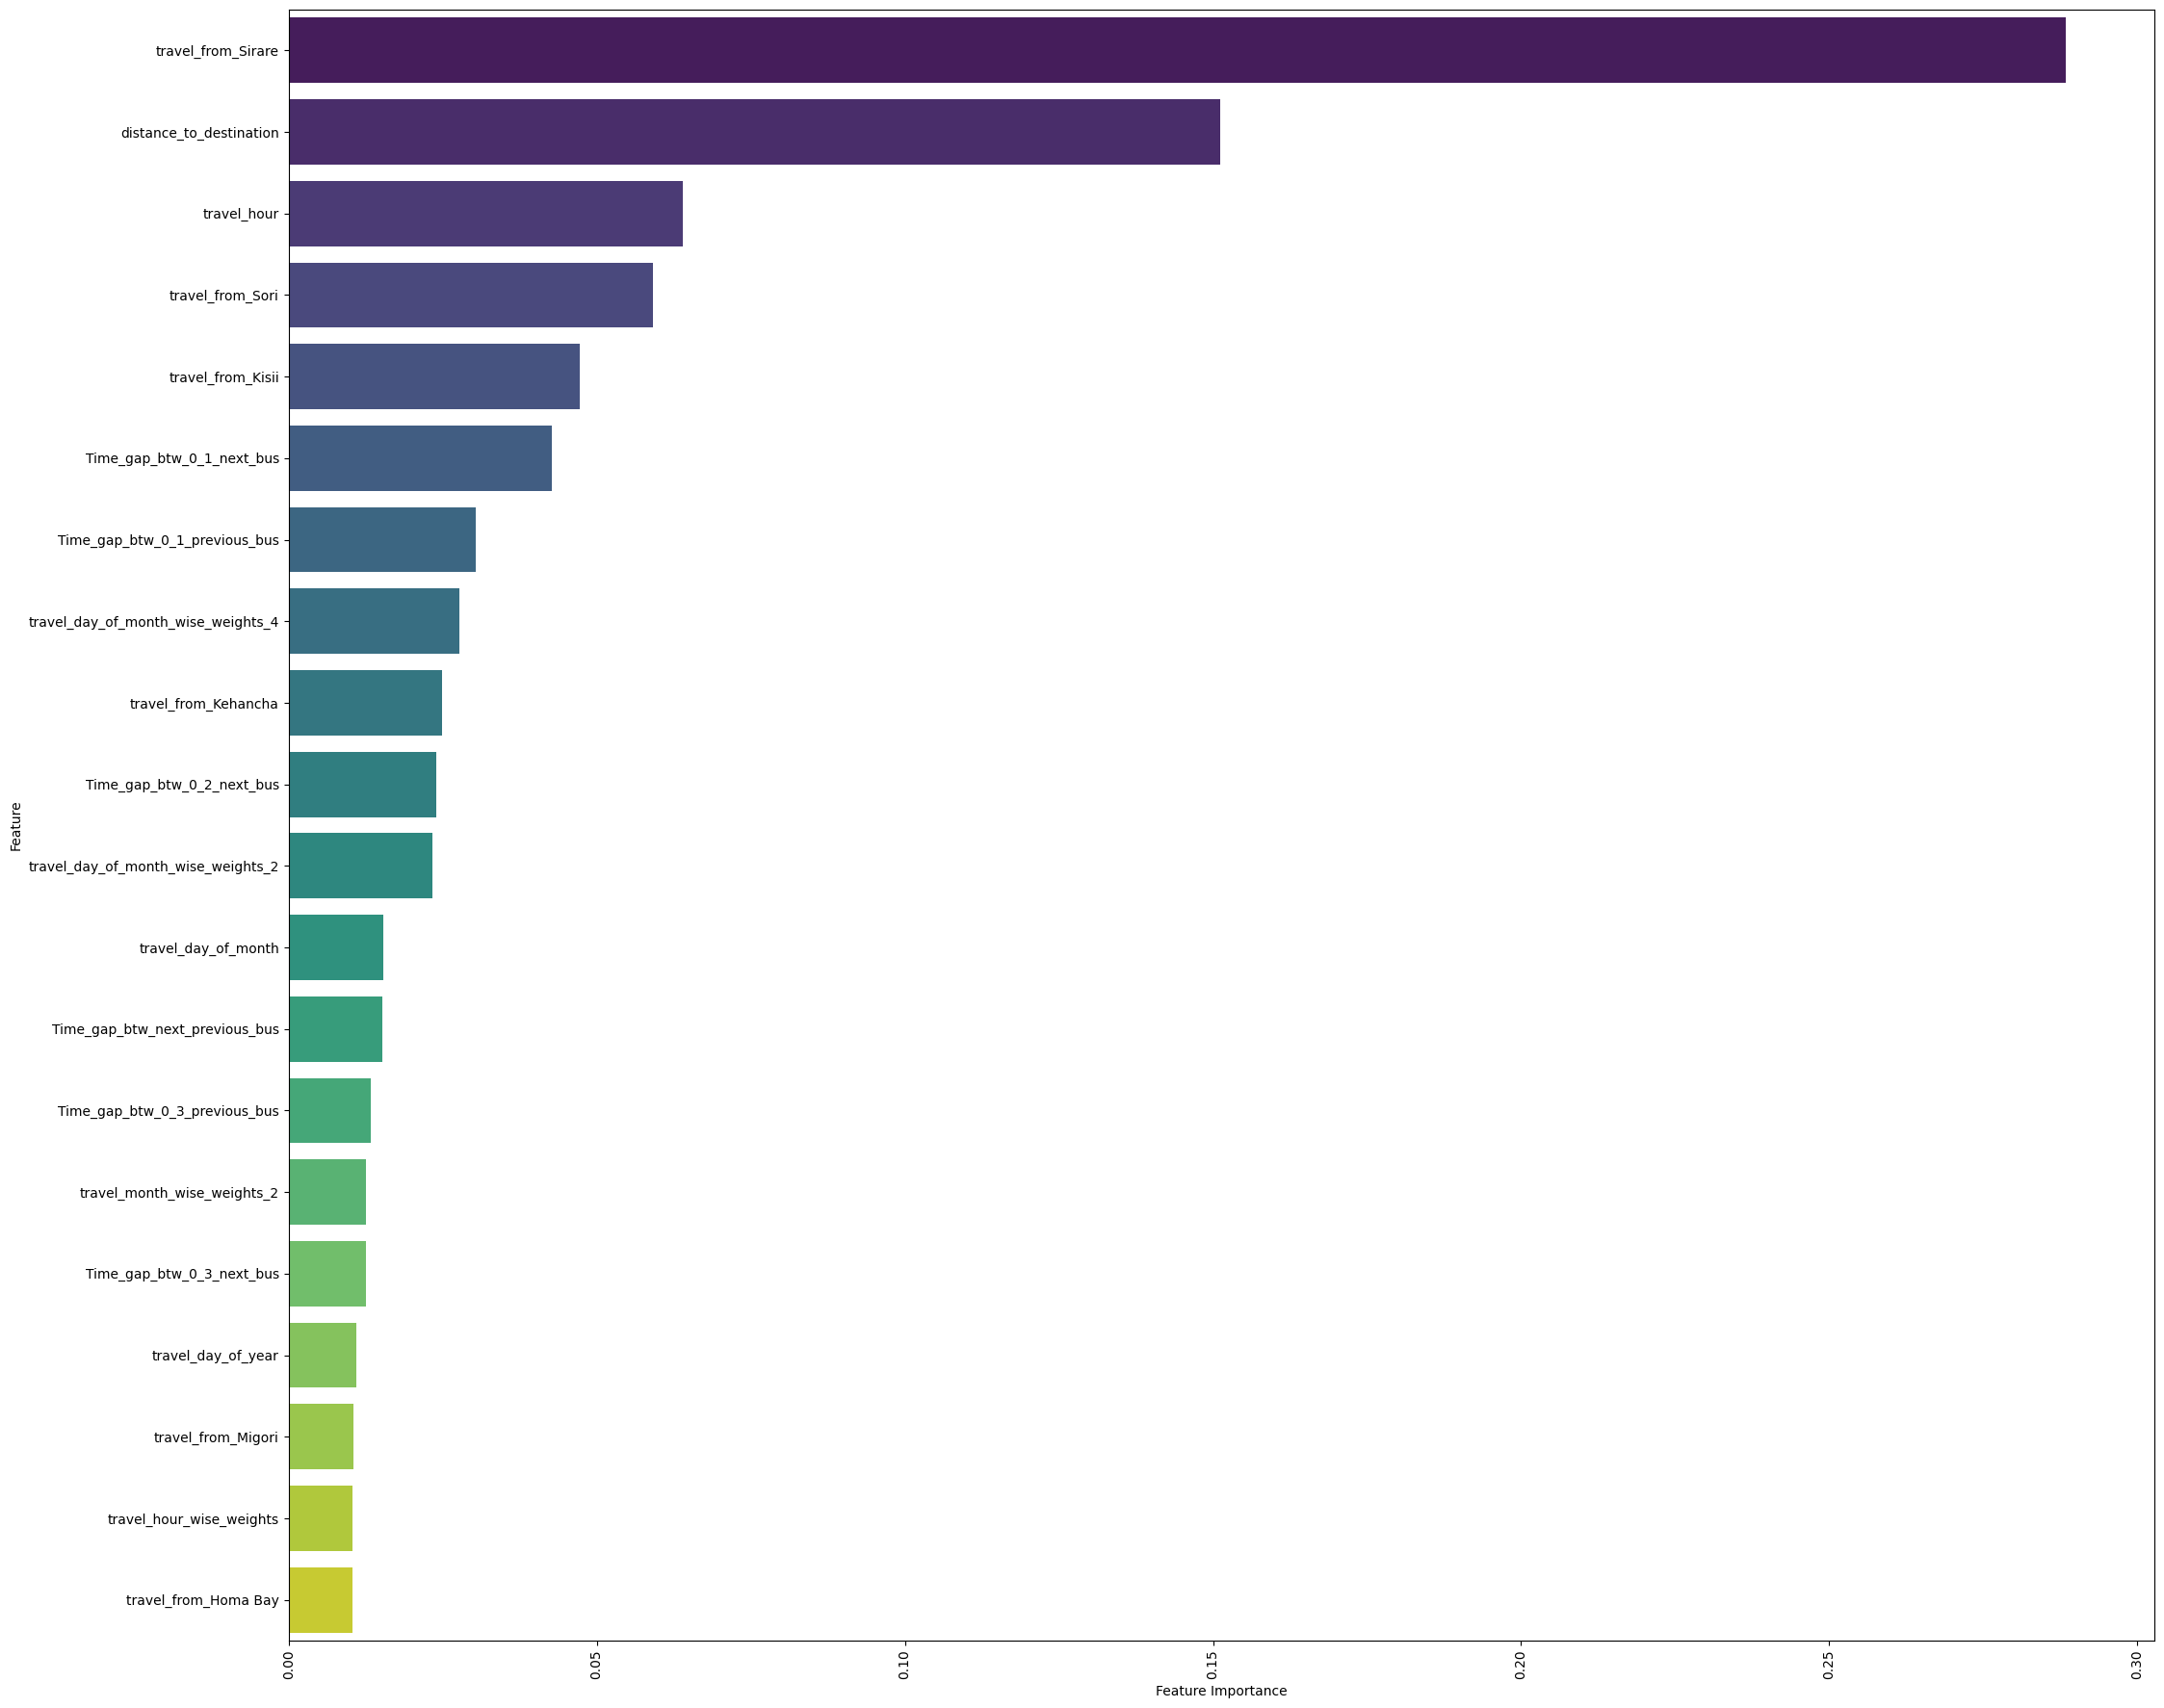

In [ ]:
#plotting the important fetures obtainind fro the optimal XGB model
fig = plt.figure(figsize=(25,22))
sns.barplot(x = 'Feature Importance', y = 'Feature', data=important_features, palette= 'viridis')
#sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)

# **Further enhancements to the model :**

## 1. Data Collection and Feature Engineering:
 - Exploring additional data sources such as weather conditions, traffic data, and passenger demographics.
 - Developing more sophisticated feature engineering techniques to capture complex relationships within the data.

## 2. Model Training and Evaluation:
- Experimenting with different model types such as neural networks or ensemble methods.
- Investigating more advanced hyperparameter tuning techniques such as Bayesian optimization or random search.
- Evaluating the models using a wider range of metrics to capture different aspects of performance.

## 3. Model Interpretation and Explainability:
 - Utilizing techniques like LIME or SHAP to understand the model's predictions and identify the most influential factors.
 - Visualizing the model's decision boundaries or feature importance to gain insights into its behavior.

## 4. Model Deployment and Integration:
  - Deploying the model into a production environment where it can be used to make real-time predictions.
 - Integrating the model with other systems or applications to enhance their functionality.

## 5. Continuous Monitoring and Improvement:
 - Continuously monitoring the model's performance in production and retraining it on new data to maintain its accuracy.
 - Exploring new research and developments in the field of transportation modeling to incorporate the latest advancements.

### By implementing these future enhancements, the model can be further refined and improved to provide even more accurate predictions and valuable insights into the factors affecting transportation demand.





# **Conclusion:**

In this study, we successfully analyzed a transportation dataset to predict the number of tickets sold for a bus company. We employed various feature engineering techniques, trained and evaluated multiple regression models, and identified the most important factors influencing ticket sales.

The XGBoost model with GridSearchCV achieved the best performance, with an R2 score of 0.95 on the test set. The top 20 most important features identified by the model were primarily related to the date, time, and location of travel.

Our findings provide valuable insights for the bus company to optimize its operations and improve its revenue. For example, the company can adjust its schedules to reduce the time gaps between consecutive buses during peak travel hours. Additionally, the company can focus its marketing efforts on specific days of the week, months, and destinations that have been identified as having higher demand.

Further research could involve exploring additional data sources, such as weather data or passenger demographics, to further enhance the model's accuracy. Moreover, investigating other machine learning models and deep learning techniques could potentially lead to even better results.

By leveraging the insights gained from this study, the bus company can make informed decisions to improve its services and meet the needs of its customers more effectively.



# <b> Future Scope </b>

## Further enhancements to the model could involve:

## 1. Data Collection and Feature Engineering:
   - Exploring additional data sources such as weather conditions, traffic data, and passenger demographics.
   - Developing more sophisticated feature engineering techniques to capture complex relationships within the data.

## 2. Model Training and Evaluation:
 - Experimenting with different model types such as neural networks or ensemble methods.
 - Investigating more advanced hyperparameter tuning techniques such as Bayesian optimization or random search.
 - Evaluating the models using a wider range of metrics to capture different aspects of performance.

## 3. Model Interpretation and Explainability:
 - Utilizing techniques like LIME or SHAP to understand the model's predictions and identify the most influential factors.
 - Visualizing the model's decision boundaries or feature importance to gain insights into its behavior.

## 4. Model Deployment and Integration:
- Deploying the model into a production environment where it can be used to make real-time predictions.
- Integrating the model with other systems or applications to enhance their functionality.

## 5. Continuous Monitoring and Improvement:
 - Continuously monitoring the model's performance in production and retraining it on new data to maintain its accuracy.
 - Exploring new research and developments in the field of transportation modeling to incorporate the latest advancements.

### By implementing these future enhancements, the model can be further refined and improved to provide even more accurate predictions and valuable insights into the factors affecting transportation demand.

